# Link Prediction

## Literatur

https://link.springer.com/content/pdf/10.1007/s10462-017-9590-2.pdf?pdf=button

http://www.cs.cornell.edu/home/kleinber/link-pred.pdf

## Was ist Link Prediction in sozialen Netzwerken?


Link Prediction ist eines der wichtigsten Forschungsthemen im Bereich Graphen und Netzwerke. Das Ziel der Link Prediction ist es, Paare von Knoten zu identifizieren, die in der Zukunft eine Verbindung bilden. Die Link Prediction ist in realen Anwendungen sehr nützlich.

## Was ist der Unterschied zwischen Missing Link und Future Link Prediction?

Missing Link Prediction:
- Zu vorhersagende Kante existierte bereits und wurde extra aus dem Graphen entfernt
- Es existierte bereits eine Verbindung zwischen zwei Konten
  
Future Link Prediction:
- Vorhersage, welche Kanten in Zukunft noch entstehen könnten
- Knoten waren vorher noch nicht verbunden

## Was sind typische Anwendungen von Link Prediction?

Ein paar Anwendungsfälle der Link Prediction:
- Vorhersagen, welche Kunden wahrscheinlich welche Produkte auf Online-Marktplätzen kaufen werden
- Interaktionen oder Kooperationen zwischen Mitarbeitern in einer Organisation vorschlagen

## Vergleich verschiedener Link Prediction Algorithmen

### 1. Lesen der Daten

Der Datensatz ist ein Kontaknetzwerk von Personal in einem Bürogebäude in Frankreich aus dem Jahr 2015. Über Sensoren wurden persönliche Kontakte gemessen. Eine Kante bedeutet, dass sich zwei Personen mindestens 20 Sekunden in einem engen Radius aufgehalten haben. Die Kanten haben auch ein Gewicht, dass der Kontaktzeit $[t-20, t]$ in Sekunden entspricht.

Für weitere Informationen siehe: http://www.sociopatterns.org/datasets/test/

In [1]:
import networkx as nx
import pandas as pd

edges = pd.read_table('office_workers.dat', sep=' ', header=None, names=['time', 'source', 'target'])
edges.head()

,time,source,target
0,28840,574,1362
1,28840,164,779
2,28860,447,763
3,28860,117,429
4,28880,447,763


In [2]:
g = nx.from_pandas_edgelist(edges, edge_attr='time')
print(f"Nodes: {g.number_of_nodes():04d}")
print(f"Edges: {g.number_of_edges()}")

Nodes: 0217
Edges: 4274


### 2. Anwendung von Link Prediction Algorithmen 

Wenden Sie die in NetworkX implementierten Link Prediction Algorithmen an. Diese berechnen für jedes nicht durch eine Kante verbundene Knotenpaar einen Score, der die 

1. Beschreiben Sie zunächst grob für jede Methode wie die Scores für Knotenpaare berechnet werden.
2. Löschen Sie zufällig jeweils 1%, 3%, 5% und 10% der Kanten. Daraus entstehen 4 neue Netzwerke $n1, n2, n3, n4$.
3. Berechnen Sie für $n1$ bis $n4$ eine Rangliste aus den Scores für fehlende Kanten mit jeder der Methoden.
4. Vergleichen Sie die angewendeten Methoden anhand des Ranges, der für die zuvor gelöschten Kannten berechnet wurde und stellen Sie das Ergebnis als Tabelle und/oder Diagramm da.

#### 2.1 Beschreibung der Methoden
Für die Aufgabe sollen die Link Prediction Algorithmen verwendet werden, die im Modul `algorithms.link_prediction` der NetworkX library vorhanden sind.

Definitionen:
- $N$ ist die Gesamtzahl an Konten im Graph
- $d(u,v)$ ist die kürzeste Distanz zwischen $u$ und $v$
- $\Gamma(k) = \{l | l\text{ ist direkter Nachbar von }k\}$
- $$f_{u,v}(w) = \begin{cases} 1 \text{ wenn $w$ zu den gleichen Communities wie $u$ und $v$ gehört} \\ 0 \text{ sonst} \end{cases}$$

Zu verwendende Methoden:

- **R**esource **A**llocation **I**ndex
  - Der RAI von $u$ und $v$ ist definiert als:
      $$rai(u,v) = \sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}\$$
- **J**accard **C**oefficient
  - Der JC von $u$ und $v$ ist definiert als:
      $$jc(u,v) = \frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$$
- **A**damic-**A**dar **I**ndex
  - Der AAI von $u$ und $v$ ist definiert als:
      $$aai(u,v) = \sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{\log |\Gamma(w)|}$$
  - Dieser Index führt zur Division durch Null für Knoten, die nur über Selbstschleifen verbunden sind bzw. nur sich selbst als Nachbarn haben.
- Preferential Attachment
  - Der PA-Score von $u$ und $v$ ist definiert als:
      $$pa(u,v) = |\Gamma(u)|\cdot|\Gamma(v)|$$
- **C**ommoin **N**eghbor von **S**oundarajan und **H**opcroft
    - Für zwei Knoten $u$ und $v$ berechnet diese Funktion die Anzahl der gemeinsame Nachbarn und einen Bonus für jeden gemeinsamen Nachbarn $w$, der zu der gleichen Community wie $u$ und $v$ gehört.
    - Der CNSH-Score von $u$ und $v$ ist definiert als:
      $$cnsh(u,v) = |\Gamma(u) \cap \Gamma(v)| + \sum_{w \in \Gamma(u) \cap \Gamma(v)} f_{u,v}(w)$$
- **R**esource **A**llocation **I**ndex von **S**oundarajan und **H**opcroft
  - Für zwei Knoten $u$ und $v$ berechnet diese Funktion den Resource
    Allocation Index, unter der Berücksichtigung dass alle gemeinsamen Nachbarn zu den gleichen Communities wie $u$ und $v$ zählen.
  - Der RAISH von $u$ und $v$ ist definiert als:
      $$raish(u,v) = \sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{f_{u,v}(w)}{|\Gamma(w)|}$$
- **W**ithin- and **I**nter-**C**luster **C**ommon **N**eighbors
  - Für zwei Knoten $u$ und $v$: Wenn ein gemeinsamer Nachbar $w$ zur selben Community wie $u$ und $v$ gehört, gilt $w$ als "within-cluster common neighbor" ($WCCN$) von $u$ und $v$. Andernfalls gilt $w$ als "inter-cluster common neighbor" ($ICCN$) von $u$ und $v$.
    - Der WICCN-Score von $u$ und $v$ mit Parameter $\alpha$ ist definiert als:
      $$wicnn(u,v) = \frac{WCCN}{ICCN}$$
- **C**ommoin **N**eghbor **C**entrality
  - Dieser Algorithmus basiert auf zwei wesentlichen Eigenschaften von Knoten, nämlich der Anzahl der gemeinsamen Nachbarn und ihrer Zentralität. Gemeinsamer Nachbar bezieht sich auf den gemeinsamen Knoten zwischen zwei Knoten. Zentralität bezieht sich auf das Prestige, das ein Knoten genießt in einem Netzwerk.
  - Der CNC-Score von $u$ und $v$ mit Parameter $\alpha$ ist definiert als:
      $$cnc_{\alpha}(u,v) = \alpha \cdot (|\Gamma (u){\cap }^{}\Gamma (v)|)+(1-\alpha )\cdot \frac{N}{d(u,v)}$$

#### 2.2 Zufälliges Löschen von Kanten

In [3]:
import random

percentages = [0.01, 0.03, 0.05, 0.1]
reduced_graphs = []
removed_edges = []

for p in percentages:
    num_of_edges_to_remove = int(g.number_of_edges() * p)
    edges_to_remove = random.sample(list(g.edges()), k=num_of_edges_to_remove)
    
    removed_edges.append(edges_to_remove)

    tmp_graph = g.copy()
    tmp_graph.remove_edges_from(edges_to_remove)
    reduced_graphs.append(tmp_graph)

for i, rg in enumerate(reduced_graphs):
    print(f"Edges in graph n{i+1} (reduced_graphs[{i}]): {rg.number_of_edges()} (removed {len(removed_edges[i]):03d} edges)")


Edges in graph n1 (reduced_graphs[0]): 4232 (removed 042 edges)
Edges in graph n2 (reduced_graphs[1]): 4146 (removed 128 edges)
Edges in graph n3 (reduced_graphs[2]): 4061 (removed 213 edges)
Edges in graph n4 (reduced_graphs[3]): 3847 (removed 427 edges)


#### 2.3 Anwenden der Methoden auf auf $n1$ bis $n4$

In [4]:
# External module to keep code in notebook clear
from utils.utils import compare_combined
from tqdm import tqdm

# Algorithms to calculate scores with
algos = {
    "normal_algos": {
        "rai": nx.resource_allocation_index,
        "jc": nx.jaccard_coefficient,
        "aai": nx.adamic_adar_index,
        "pa": nx.preferential_attachment,
        "cnc": nx.common_neighbor_centrality
    },
    "community_algos": {
        "cnsh": nx.cn_soundarajan_hopcroft,
        "raish": nx.ra_index_soundarajan_hopcroft,
        "wiccn": nx.within_inter_cluster
    }
}

# Calculate communities for algorithms in algos["community_algos"]
communities = list(nx.community.greedy_modularity_communities(rg))

results = []
for i, rg in tqdm(list(enumerate(reduced_graphs))):
    res = compare_combined(algos, rg, removed_edges[i], communities)
    results.append(res)

100%|██████████| 4/4 [00:09<00:00,  2.31s/it]


#### 2.4 Vergleichen der Algorithmen und Darstellung

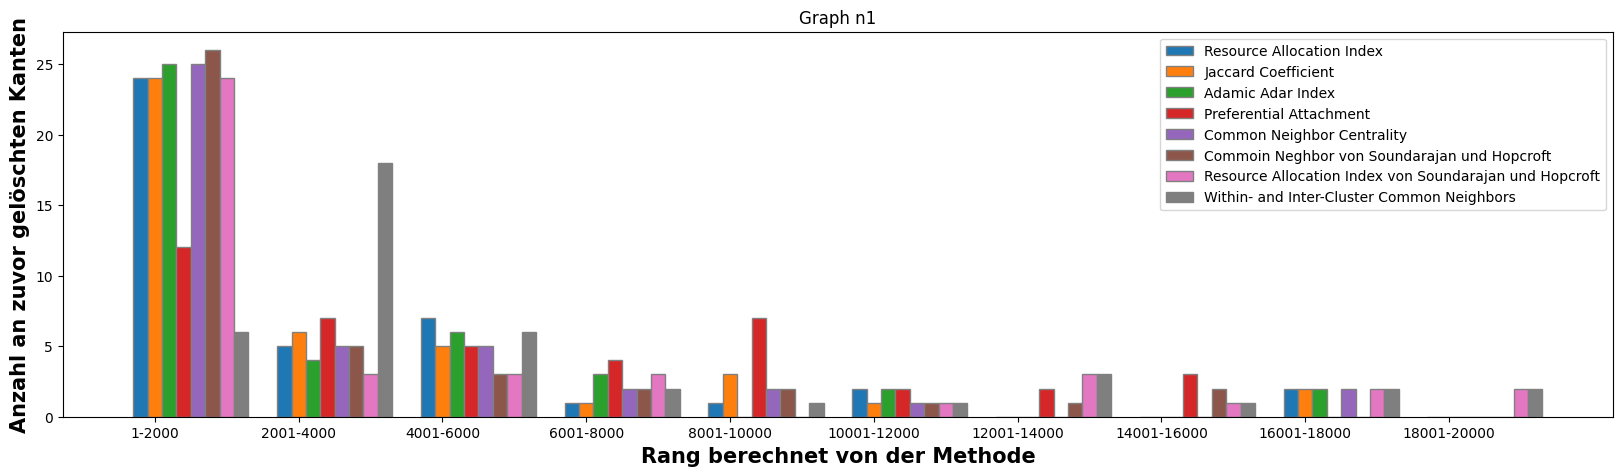

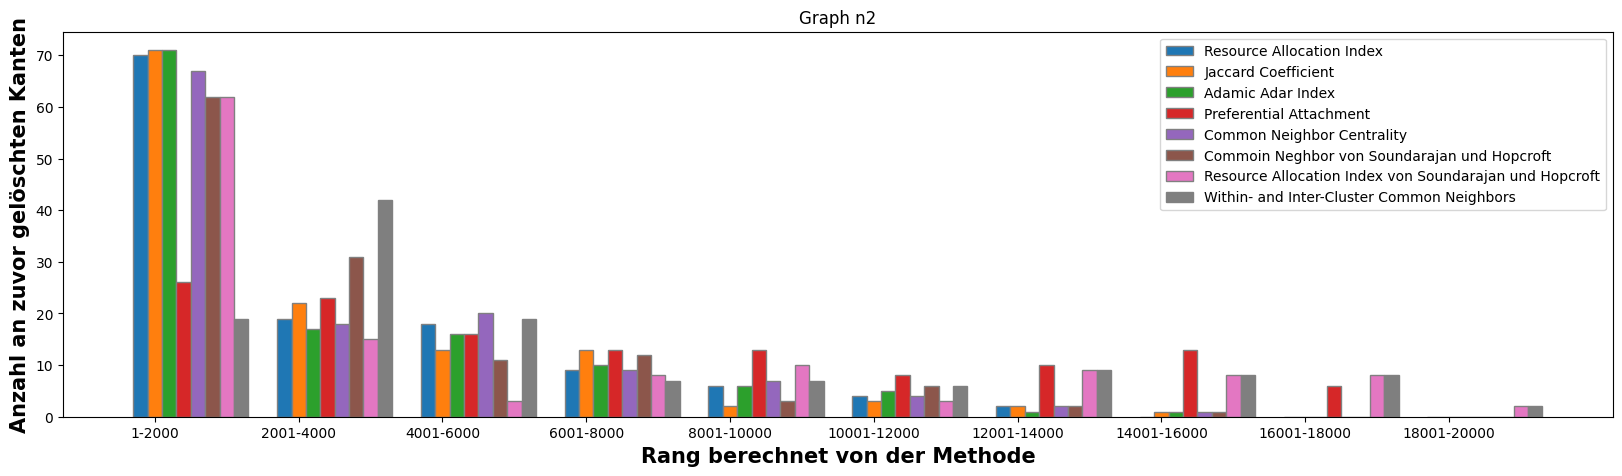

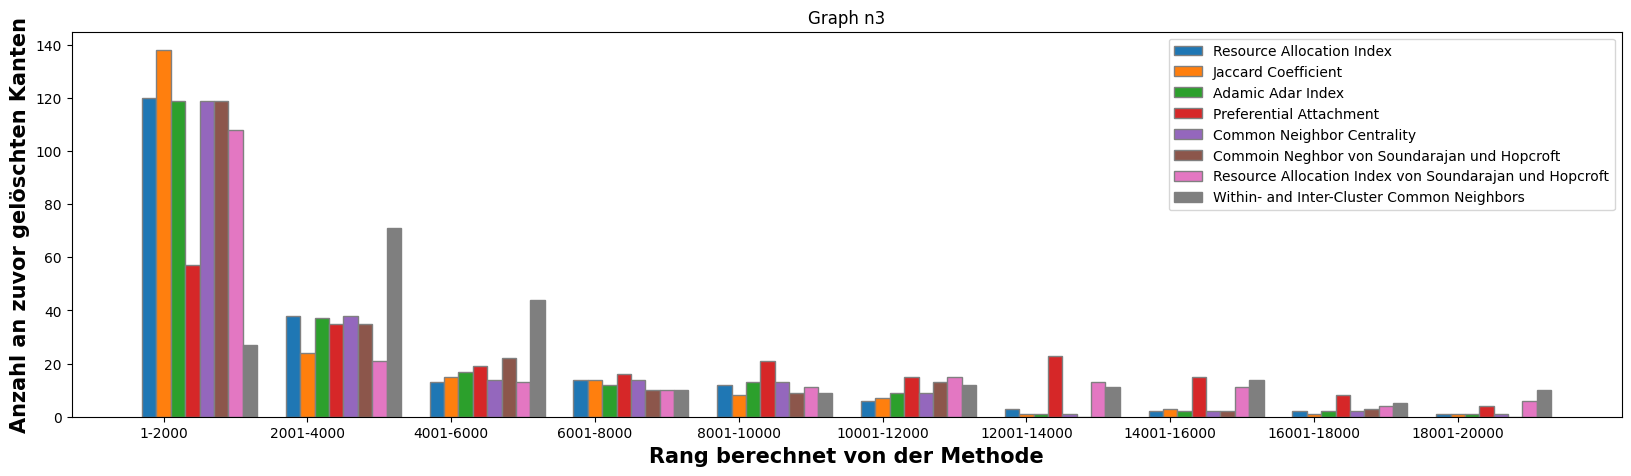

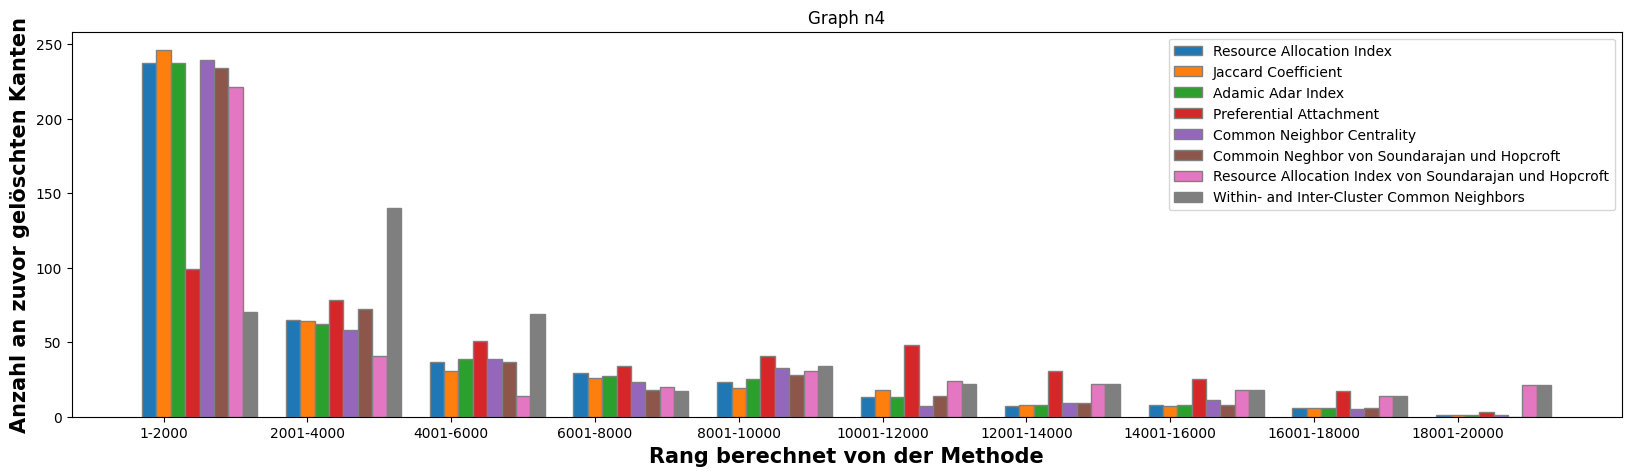

In [8]:
# External module to keep code in notebook clear
from utils.utils import plot_results

scope = (0, 20_000)
num_of_intervals = 10

for i, result in enumerate(results):
    plot_results(i+1, result, scope, num_of_intervals)


### 3. Auswertung

- Gibt es eine Methode, die generell am besten funktioniert?
- Können Sie Vor- und Nachteile der angewendeten Methoden benennen?

## 4. Zusatzaufgabe

Wiederholen Sie die obige Auswertung für weitere Netzwerke, z.B. aus dem SocioPatterns Katalog.

http://www.sociopatterns.org/datasets/